<a href="https://colab.research.google.com/github/IsaiyarasanD/IRIS/blob/main/iris_species.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm, skew

In [3]:
df = pd.read_csv('/content/Iris (1).csv').drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


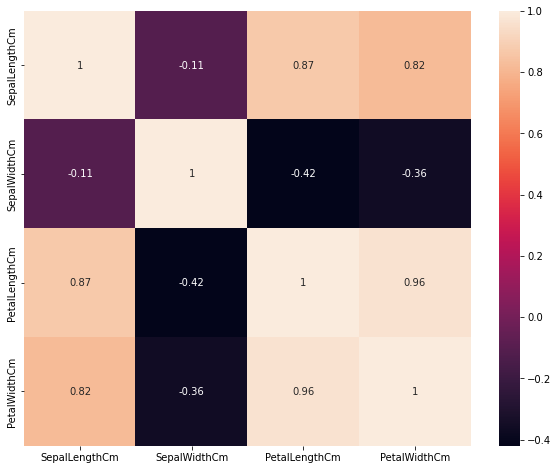

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

DATA VISUALISATION

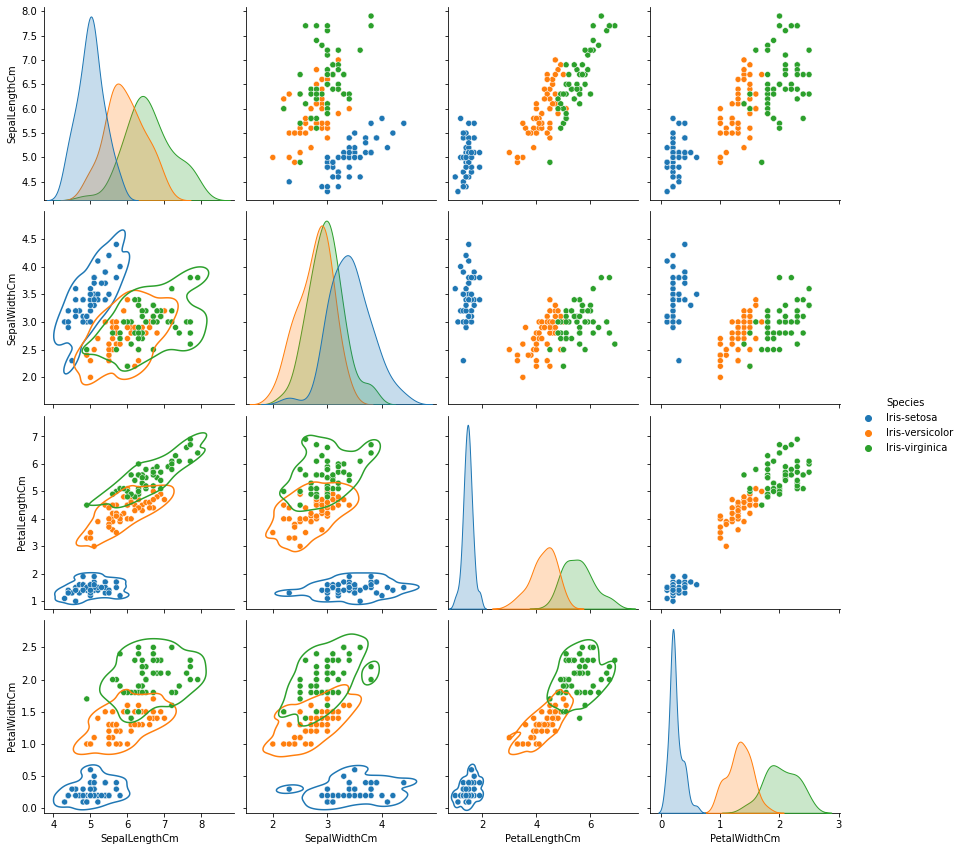

In [13]:
sns.pairplot(df, hue='Species', height=3).map_lower(sns.kdeplot, levels=2)
plt.show()

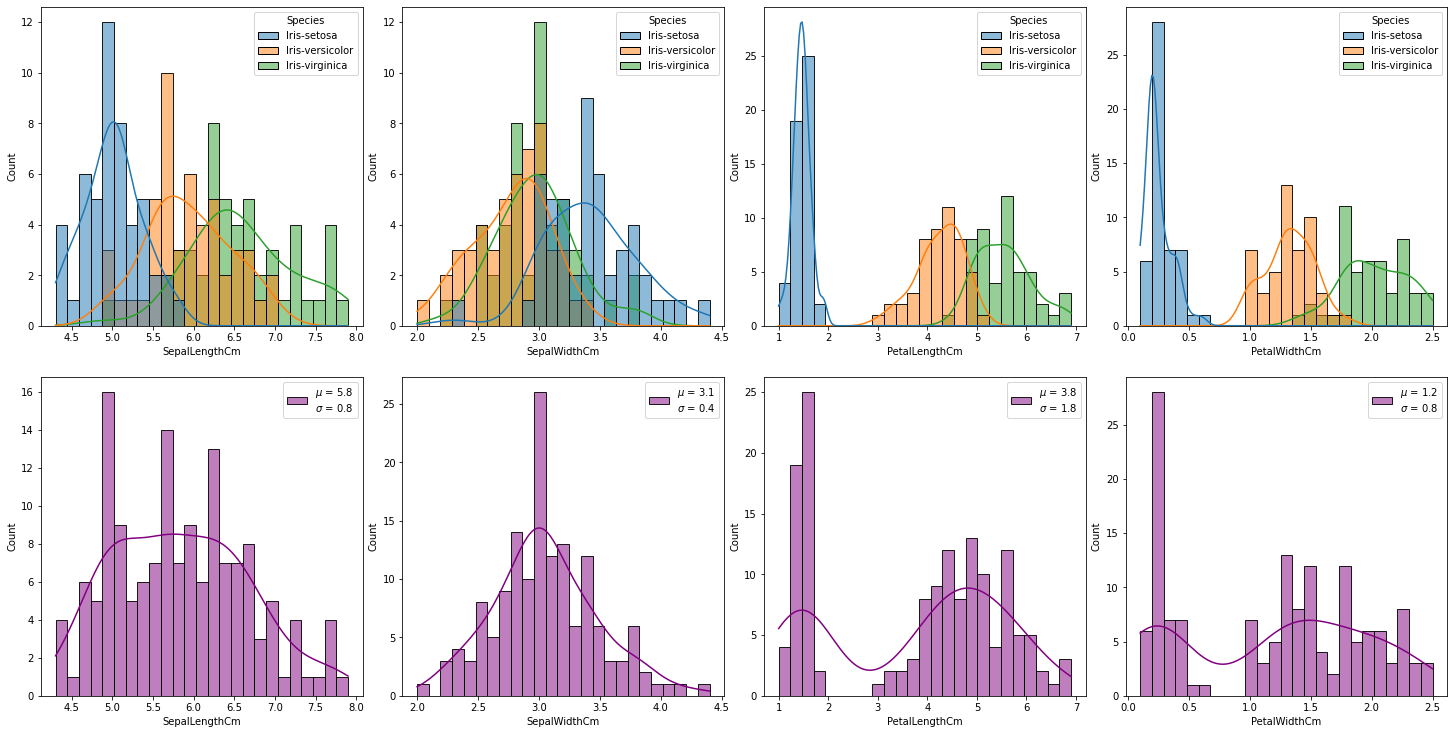

In [16]:
fig, axes = plt.subplots(2, 4,figsize=(20,10))

# Categorized Histograms
for ax, col in zip(axes.flatten(), df.columns[:-1]):
    sns.histplot(data=df, x=col, kde=True, bins=25, hue='Species' ,ax=ax)

# Total Histograms
for ax, col in zip(axes.flatten()[4:], df.columns[:-1]):
    mu, sigma = norm.fit(df[col])
    sns.histplot(data=df, x=col, kde=True, bins=25, color='purple', ax=ax,
                 label=f'$\mu$ = {mu:.1f}\n$\sigma$ = {sigma:.1f}')
    ax.legend()
    
plt.tight_layout(pad=0, w_pad=0, h_pad=2)
plt.show()

In [17]:
from plotly.express import scatter_matrix
from plotly.express import parallel_categories
from plotly.express import scatter_3d

In [18]:
scatter_matrix(df, dimensions=df.columns[:-1], color='Species',
               color_discrete_sequence=['yellow', 'red', 'purple'])

In [19]:
scatter_3d(x='PetalLengthCm',
           y='PetalWidthCm',
           z='SepalLengthCm',
           color='Species',
           color_discrete_sequence=['yellow', 'red', 'purple'],
           data_frame=df).show()


In [22]:
from sklearn.model_selection import train_test_split #
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier      
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB           
from sklearn import svm                             
# Model analysis functions
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

Train & Test Split

In [23]:
X = df.drop('Species', axis=1)
y = df['Species']
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3, 
                                                    random_state=50)

print(f'Shapes | X - Train: {X_train.shape}\t | X - Test {X_test.shape}')
print(f'Shapes | Y - Train: {y_train.shape}\t | Y - Test {y_test.shape}')

Shapes | X - Train: (105, 4)	 | X - Test (45, 4)
Shapes | Y - Train: (105,)	 | Y - Test (45,)


In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.transform(X_test)

In [52]:
acc_score_model=[]

 Multinomial Logistic Regression Model 

In [25]:
MR = LogisticRegression(multi_class='multinomial', random_state=0)

# Fitting Model
MR.fit(X_train, y_train)

# Getting Predictions
MR_pred = MR.predict(X_test)

In [53]:
MR_ac = accuracy_score(y_test, MR_pred)
acc_score_model.append(MR_ac)
print(f'Accuracy Score:{MR_ac}')

Accuracy Score:0.9777777777777777


In [29]:
MR_pred_df = pd.DataFrame(pd.Series(MR_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), MR_pred_df], axis=1)

,Species,Test Outcome
Iris-versicolor,17,16
Iris-setosa,14,14
Iris-virginica,14,15


Multinomial Logistic Regression Model Coefficients 

In [32]:
print(f'Intercept:\n{MR.intercept_}')
print(f'Coefficients:\n{MR.coef_}')

Intercept:
[  9.56778559   1.79393637 -11.36172196]
Coefficients:
 [[-0.49534399  0.82564251 -2.25607417 -0.91244347]
 [ 0.50810923 -0.32626616 -0.16168155 -0.89203784]
 [-0.01276524 -0.49937635  2.41775572  1.80448132]]


Classification Report of Multinomial Model

In [34]:
print(classification_report(y_test, MR_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.94      0.97        17
 Iris-virginica       0.93      1.00      0.97        14

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



Decision Tree Classifier 

In [35]:
DT = DecisionTreeClassifier()

# Fitting Model
DT.fit(X_train, y_train)

# Getting Predictions
DT_pred = DT.predict(X_test)

In [54]:
DT_ac = accuracy_score(y_test, DT_pred)
acc_score_model.append(DT_ac)
print(f'Accuracy Score: {DT_ac}\n')

Accuracy Score: 0.9555555555555556



In [37]:
DT_pred_df = pd.DataFrame(pd.Series(DT_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), DT_pred_df], axis=1)

,Species,Test Outcome
Iris-versicolor,17,17
Iris-setosa,14,14
Iris-virginica,14,14


Classification Report of Decision Tree Classifier

In [38]:
print(classification_report(y_test, DT_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



K-Nearest Neighbors Model

K-Nearest Neighbors Forming Model 

In [39]:
KNN = KNeighborsClassifier(n_neighbors=10)

# Fitting Model 
KNN.fit(X_train_ss, y_train)

# Getting Predictions
KNN_pred = KNN.predict(X_test_ss)

In [55]:
KNN_ac = accuracy_score(y_test, KNN_pred)
acc_score_model.append(KNN_ac)
print(f'Accuracy Score: {KNN_ac}\n')

Accuracy Score: 0.9555555555555556



In [42]:
KNN_pred_df = pd.DataFrame(pd.Series(KNN_pred).value_counts(), columns=['Test Outcome'])
pd.concat([y_test.value_counts(), KNN_pred_df], axis=1)

,Species,Test Outcome
Iris-versicolor,17,17
Iris-setosa,14,14
Iris-virginica,14,14


In [43]:
print(classification_report(y_test, KNN_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



Gaussian Naive Bayes

In [44]:
GN = GaussianNB()

# Fitting Model
GN.fit(X_train, y_train)

# Getting Predictions
GM_pred = GN.predict(X_test)

In [56]:
GM_ac = accuracy_score(y_test, GM_pred)
acc_score_model.append(GM_ac)
print(f'Accuracy Score: {GM_ac}\n')

Accuracy Score: 0.9555555555555556



Classification Report of Gaussian Naive Bayes

In [46]:
print(classification_report(y_test, GM_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.94      0.94        17
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



Support Vector Machine

In [47]:
SV = svm.SVC()

# Fitting Model
SV.fit(X_train, y_train)

# Getting Predictions 
SV_pred = SV.predict(X_test)

In [57]:
SV_ac = accuracy_score(y_test, SV_pred)
acc_score_model.append(SV_ac)
print(f'Accuracy Score: {SV_ac}\n')

Accuracy Score: 0.9555555555555556



Classification Report of Support Vector Machine

In [50]:
print(classification_report(y_test, SV_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.88      0.94        17
 Iris-virginica       0.88      1.00      0.93        14

       accuracy                           0.96        45
      macro avg       0.96      0.96      0.96        45
   weighted avg       0.96      0.96      0.96        45



Comparing Models 

In [61]:
modelnames=["MLR","DT","KNN","GM","SVC"]
model_ac = pd.DataFrame(dict(zip(modelnames, acc_score_model)), index=['model_names']).T
model_ac.rename(columns={'model_names': 'Accuracy'}, inplace=True)
round(model_ac, 2)

,Accuracy
MLR,0.98
DT,0.96
KNN,0.96
GM,0.96
SVC,0.96


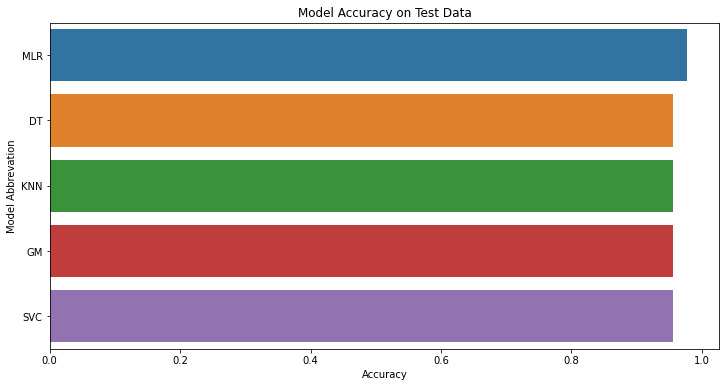

In [62]:
plt.figure(figsize=(12,6))
sns.barplot(x='Accuracy', y=model_ac.index, data=model_ac)
plt.title('Model Accuracy on Test Data')
plt.ylabel('Model Abbrevation')
plt.show()